# Heart Disease Prediction Using Artificial Neural Networks

In this project, we aim to predict whether a patient is at risk of heart disease based on various medical features, including age, cholesterol, blood pressure, and other health-related factors. The dataset we will be using contains information about patients and a target column `has_disease` (0 = No, 1 = Yes). 

The task involves using deep learning techniques, specifically Artificial Neural Networks (ANNs), to classify whether a patient is likely to develop heart disease based on their medical records. This problem is a binary classification task, where the goal is to predict if a patient has heart disease (1) or not (0).

## Problem Statement

Given a dataset of patients with various medical records, we need to develop an Artificial Neural Network (ANN) that will classify the patients into two categories:
- **has_disease = 0**: Patient does not have heart disease.
- **has_disease = 1**: Patient is at risk of heart disease.

We will build, train, and evaluate a deep learning model using Keras. The model's goal is to help healthcare professionals identify high-risk patients and provide early interventions.

## Why Solve This Problem?

Predicting heart disease early can lead to timely medical intervention, reducing the risk of serious complications or even death. Machine learning models can help healthcare professionals make better decisions by analyzing large amounts of data, identifying patterns, and detecting risk factors more accurately.

---

### Step a: Import Libraries

To begin, we need to import the necessary libraries for data processing, model building, and training. We'll be using the following libraries:

- **Pandas** and **NumPy** for data manipulation and numerical operations.
- **Scikit-learn** for tasks such as splitting the dataset into training and testing sets, scaling features, and computing class weights.
- **Keras** (with TensorFlow backend) for building and training the Artificial Neural Network (ANN).

Let's import the required libraries now.


In [1]:
# a. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

### Step b: Load Dataset

In this step, we will load the dataset containing the patient data. The data is provided in a CSV file format. We'll use **Pandas** to load and explore the dataset. After loading the dataset, we will inspect the first few rows to understand its structure and check for any missing values.

Let's load the dataset and preview the first few rows.


In [6]:
# b. Load dataset
df = pd.read_csv("C:/Users/HP/Downloads/archive (3)/heart.csv")  # Replace with your file name
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


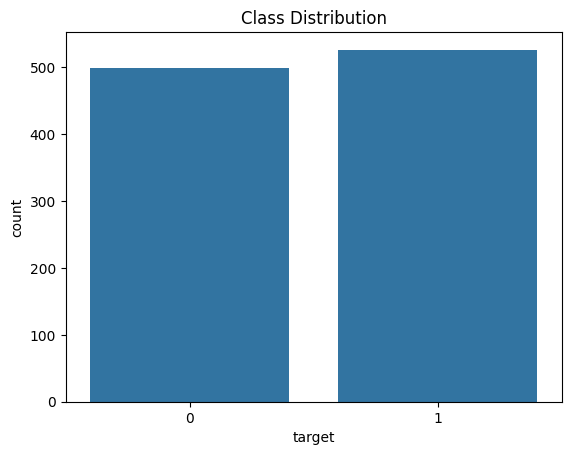

In [9]:
# Optional: Visualize class distribution
sns.countplot(x='target', data=df)
plt.title("Class Distribution")
plt.show()

In [10]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

### Step c: Train-Test Split

To evaluate the model’s performance, we need to divide the dataset into training and testing sets. The **training set** is used to train the model, while the **testing set** is used to assess how well the model generalizes to new, unseen data.

We'll also separate the dataset into:
- **Features (`X`)**: All columns except the target (`has_disease`) named here as (`target`)
- **Target (`y`)**: The `has_disease` column named here as (`target`)

We'll use an 80-20 split, where 80% of the data is used for training and 20% for testing.


In [11]:
# c. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Step d: Feature Scaling

Neural networks are sensitive to the scale of input features. Features with larger ranges can dominate the learning process, leading to suboptimal performance.

To ensure all features contribute equally, we'll apply **standardization** using `StandardScaler` from Scikit-learn. This will scale the features to have a mean of 0 and a standard deviation of 1.

We'll fit the scaler on the training data and apply the same transformation to both the training and testing sets.


In [12]:
# d. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step e: Compute Class Weights

In many medical datasets, class imbalance is common—meaning one class (e.g., patients **without** heart disease) may significantly outnumber the other (e.g., patients **with** heart disease). If we ignore this, the model might become biased toward predicting the majority class.

To address this, we can compute **class weights**. Class weights assign higher importance to the minority class during training, helping the model learn from both classes more effectively.

We'll use `compute_class_weight` from Scikit-learn to calculate the weights.


In [13]:
# e. Compute class weights to handle imbalance
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = {0: weights[0], 1: weights[1]}
print(f"Class Weights: {class_weights}")

Class Weights: {0: 1.0275689223057645, 1: 0.9738717339667459}


### Step f: Build the Model

Now we’ll build an **Artificial Neural Network (ANN)** using Keras. The model will include:

- An **input layer** that matches the number of features.
- One or more **hidden layers** with ReLU activation, which helps the model learn non-linear relationships.
- An **output layer** with a **sigmoid** activation function since we’re performing **binary classification** (0 = No disease, 1 = Has disease).

The sigmoid function outputs a value between 0 and 1, representing the probability of the patient having heart disease.

Let's define and compile the model.


In [14]:
# f. Build ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

C:\python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
# Show model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Train the model
history = model.fit(X_train_scaled, y_train,
                    epochs=50,
                    batch_size=32,
                    class_weight=class_weights,
                    validation_split=0.2,
                    verbose=2)

Epoch 1/50
21/21 - 0s - 10ms/step - accuracy: 0.9070 - loss: 0.2371 - val_accuracy: 0.8537 - val_loss: 0.3007
Epoch 2/50
21/21 - 0s - 8ms/step - accuracy: 0.9070 - loss: 0.2188 - val_accuracy: 0.8659 - val_loss: 0.2911
Epoch 3/50
21/21 - 0s - 8ms/step - accuracy: 0.9101 - loss: 0.2284 - val_accuracy: 0.8780 - val_loss: 0.2860
Epoch 4/50
21/21 - 0s - 8ms/step - accuracy: 0.9116 - loss: 0.2222 - val_accuracy: 0.8780 - val_loss: 0.2839
Epoch 5/50
21/21 - 0s - 8ms/step - accuracy: 0.9070 - loss: 0.2267 - val_accuracy: 0.8841 - val_loss: 0.2823
Epoch 6/50
21/21 - 0s - 8ms/step - accuracy: 0.9223 - loss: 0.2080 - val_accuracy: 0.8841 - val_loss: 0.2745
Epoch 7/50
21/21 - 0s - 8ms/step - accuracy: 0.9116 - loss: 0.2195 - val_accuracy: 0.8720 - val_loss: 0.2742
Epoch 8/50
21/21 - 0s - 8ms/step - accuracy: 0.9192 - loss: 0.2249 - val_accuracy: 0.8659 - val_loss: 0.2766
Epoch 9/50
21/21 - 0s - 8ms/step - accuracy: 0.9192 - loss: 0.2208 - val_accuracy: 0.8537 - val_loss: 0.2786
Epoch 10/50
21/21 

In [25]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_accuracy*100:.2f}%")

7/7 - 0s - 11ms/step - accuracy: 0.9561 - loss: 0.1418

✅ Test Accuracy: 95.61%


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       100
           1       0.95      0.96      0.96       105

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205

📊 Confusion Matrix:


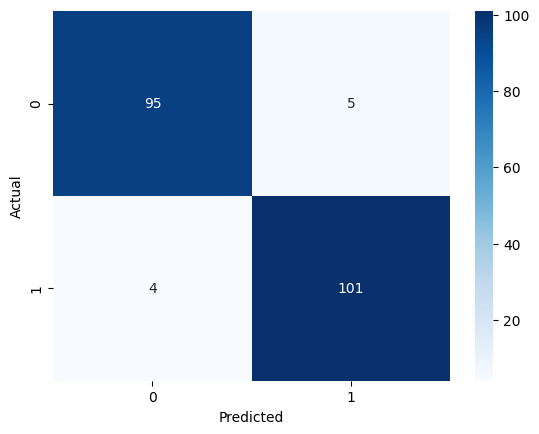

In [26]:
# Predict and evaluate further
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

print("📊 Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [27]:
# ROC AUC Score
y_prob = model.predict(X_test_scaled)
roc_score = roc_auc_score(y_test, y_prob)
print(f"\n🔍 ROC AUC Score: {roc_score:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  

🔍 ROC AUC Score: 0.9888


In [28]:
# Optional: Plot accuracy and loss over epochs
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

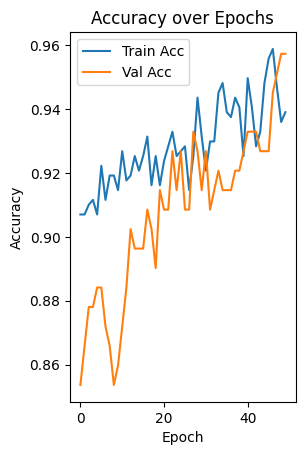

In [29]:
# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

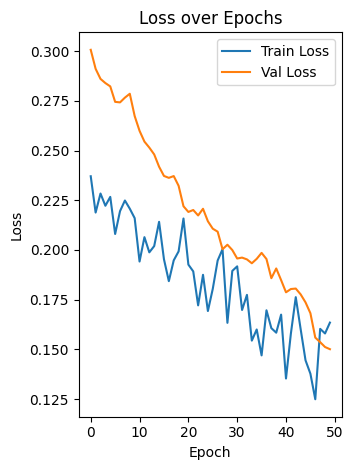

In [30]:
# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [33]:
# Example: Unseen patient data (manually input one sample)
# Format: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]
unseen_patient = np.array([[55, 1, 0, 140, 230, 0, 1, 150, 0, 2.3, 2, 0, 3]])

# Step 1: Scale the input using the same scaler used during training
unseen_scaled = scaler.transform(unseen_patient)

# Step 2: Predict using the trained model
prediction_prob = model.predict(unseen_scaled)[0][0]
prediction = 1 if prediction_prob > 0.5 else 0

# Step 3: Display the prediction
print(f"🩺 Predicted Probability of Heart Disease: {prediction_prob:.4f}")
print(f"🧠 Predicted Class: {'At Risk (1)' if prediction == 1 else 'No Risk (0)'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step

C:\python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
🩺 Predicted Probability of Heart Disease: 0.0424
🧠 Predicted Class: No Risk (0)


In [34]:
# Example: Unseen patient data (manually input one sample)
# Format: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]
unseen_patient = np.array([[60, 0, 2, 160, 250, 0, 0, 130, 1, 1.5, 1, 1, 2]])

# Step 1: Scale the input using the same scaler used during training
unseen_scaled = scaler.transform(unseen_patient)

# Step 2: Predict using the trained model
prediction_prob = model.predict(unseen_scaled)[0][0]
prediction = 1 if prediction_prob > 0.5 else 0

# Step 3: Display the prediction
print(f"🩺 Predicted Probability of Heart Disease: {prediction_prob:.4f}")
print(f"🧠 Predicted Class: {'At Risk (1)' if prediction == 1 else 'No Risk (0)'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
🩺 Predicted Probability of Heart Disease: 0.5025
🧠 Predicted Class: At Risk (1)


C:\python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [35]:
# Example: Unseen patient data (manually input one sample)
# Format: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]
unseen_patient = np.array([[45, 1, 0, 130, 200, 0, 1, 170, 0, 0.5, 2, 0, 3]])

# Step 1: Scale the input using the same scaler used during training
unseen_scaled = scaler.transform(unseen_patient)

# Step 2: Predict using the trained model
prediction_prob = model.predict(unseen_scaled)[0][0]
prediction = 1 if prediction_prob > 0.5 else 0

# Step 3: Display the prediction
print(f"🩺 Predicted Probability of Heart Disease: {prediction_prob:.4f}")
print(f"🧠 Predicted Class: {'At Risk (1)' if prediction == 1 else 'No Risk (0)'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
🩺 Predicted Probability of Heart Disease: 0.3978
🧠 Predicted Class: No Risk (0)


C:\python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [36]:
# Example: Unseen patient data (manually input one sample)
# Format: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]
unseen_patient = np.array([[70, 0, 1, 140, 300, 1, 1, 120, 1, 2.0, 1, 2, 2]])

# Step 1: Scale the input using the same scaler used during training
unseen_scaled = scaler.transform(unseen_patient)

# Step 2: Predict using the trained model
prediction_prob = model.predict(unseen_scaled)[0][0]
prediction = 1 if prediction_prob > 0.5 else 0

# Step 3: Display the prediction
print(f"🩺 Predicted Probability of Heart Disease: {prediction_prob:.4f}")
print(f"🧠 Predicted Class: {'At Risk (1)' if prediction == 1 else 'No Risk (0)'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


C:\python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


🩺 Predicted Probability of Heart Disease: 0.0008
🧠 Predicted Class: No Risk (0)


In [37]:
# Example: Unseen patient data (manually input one sample)
# Format: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]
unseen_patient = np.array([[35, 1, 0, 120, 210, 0, 0, 180, 0, 0.3, 2, 0, 3]])

# Step 1: Scale the input using the same scaler used during training
unseen_scaled = scaler.transform(unseen_patient)

# Step 2: Predict using the trained model
prediction_prob = model.predict(unseen_scaled)[0][0]
prediction = 1 if prediction_prob > 0.5 else 0

# Step 3: Display the prediction
print(f"🩺 Predicted Probability of Heart Disease: {prediction_prob:.4f}")
print(f"🧠 Predicted Class: {'At Risk (1)' if prediction == 1 else 'No Risk (0)'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
🩺 Predicted Probability of Heart Disease: 0.2583
🧠 Predicted Class: No Risk (0)


C:\python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
# Example: Unseen patient data (manually input one sample)
# Format: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]
unseen_patient = np.array([[50, 1, 1, 130, 240, 0, 1, 140, 1, 1.0, 2, 1, 3]])

# Step 1: Scale the input using the same scaler used during training
unseen_scaled = scaler.transform(unseen_patient)

# Step 2: Predict using the trained model
prediction_prob = model.predict(unseen_scaled)[0][0]
prediction = 1 if prediction_prob > 0.5 else 0

# Step 3: Display the prediction
print(f"🩺 Predicted Probability of Heart Disease: {prediction_prob:.4f}")
print(f"🧠 Predicted Class: {'At Risk (1)' if prediction == 1 else 'No Risk (0)'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
🩺 Predicted Probability of Heart Disease: 0.0618
🧠 Predicted Class: No Risk (0)


C:\python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
